<a href="https://colab.research.google.com/github/KrishnaSChavan/MachineLearning/blob/main/Multi_food_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional neural network
### Multi class classification

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip



--2023-03-31 09:57:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  24.0MB/s    in 22s     

2023-03-31 09:58:00 (22.5 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

# Essential functions

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
import pathlib

In [4]:
# visualing images
def view_random_img(target_dir,target_class):
    #targeting a directory
    target_folder = target_dir+"/"+target_class

    # getting random image path
    random_image = random.sample(os.listdir(target_folder),1)

    #reading image and ploting
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    # show input shape
    print(f"Image shape = {img.shape}") 
    return(img)

In [5]:
def model_details(model = None):
    return tf.keras.utils.plot_model(model,to_file='model.png', show_shapes=True, show_dtype=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96, layer_range=None, show_layer_activations=True)

In [6]:
def loss_curve(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs =  range(len(history.history['loss']))

    plt.plot(epochs,loss,label='loss')
    plt.plot(epochs,val_loss,label='val_loss')
    plt.title('loss')
    plt.legend()

    plt.figure()

    plt.plot(epochs,accuracy,label='accuracy')
    plt.plot(epochs,val_accuracy,label='val_accuracy')
    plt.title('accuracy')
    plt.legend()

# Visualization

In [7]:
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"): 
  print(f"There are {dirnames} directories and {len(filenames)} images in '{dirpath}'.")

There are ['test', 'train'] directories and 0 images in '10_food_classes_all_data'.
There are ['steak', 'fried_rice', 'ice_cream', 'grilled_salmon', 'chicken_wings', 'sushi', 'pizza', 'chicken_curry', 'ramen', 'hamburger'] directories and 0 images in '10_food_classes_all_data/test'.
There are [] directories and 250 images in '10_food_classes_all_data/test/steak'.
There are [] directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are [] directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are [] directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are [] directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are [] directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are [] directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are [] directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are [] directories a

In [8]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [9]:
# naming class
import numpy as np
import pathlib
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

In [10]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Image shape = (341, 512, 3)


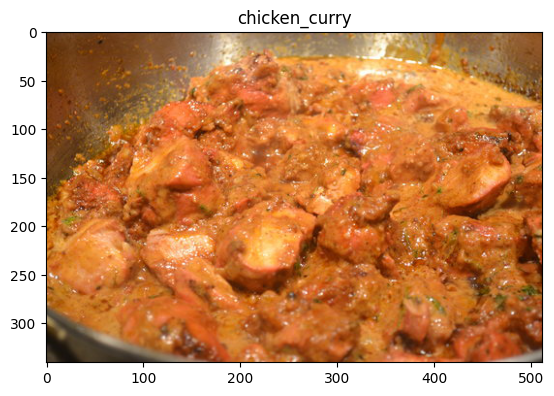

In [11]:
img = view_random_img(train_dir,random.choice(class_names))

# Preprocess

In [12]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# converting data into batches

train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)
test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# Building model

In [13]:
model1 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           input_shape=(224,224,3),
           activation = 'relu',
           padding='valid'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])

In [14]:
model1.compile(
    loss='categorical_crossentropy',
    optimizer = Adam(),
    metrics=['accuracy']
)

In [15]:
history=model1.fit(train_data,
                   epochs=5,
                   steps_per_epoch=len(train_data),
                   validation_data=test_data,
                   validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 67s 241ms/step - loss: 2.2331 - accuracy: 0.1681 - val_loss: 2.0593 - val_accuracy: 0.2368
Epoch 2/5
235/235 [==============================] - 51s 217ms/step - loss: 1.9964 - accuracy: 0.2927 - val_loss: 1.9720 - val_accuracy: 0.2968
Epoch 3/5
235/235 [==============================] - 53s 223ms/step - loss: 1.7904 - accuracy: 0.3812 - val_loss: 1.9295 - val_accuracy: 0.3332
Epoch 4/5
235/235 [==============================] - 52s 221ms/step - loss: 1.4473 - accuracy: 0.5101 - val_loss: 2.1279 - val_accuracy: 0.3044
Epoch 5/5
235/235 [==============================] - 51s 218ms/step - loss: 0.8818 - accuracy: 0.7079 - val_loss: 2.6327 - val_accuracy: 0.2760


In [16]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

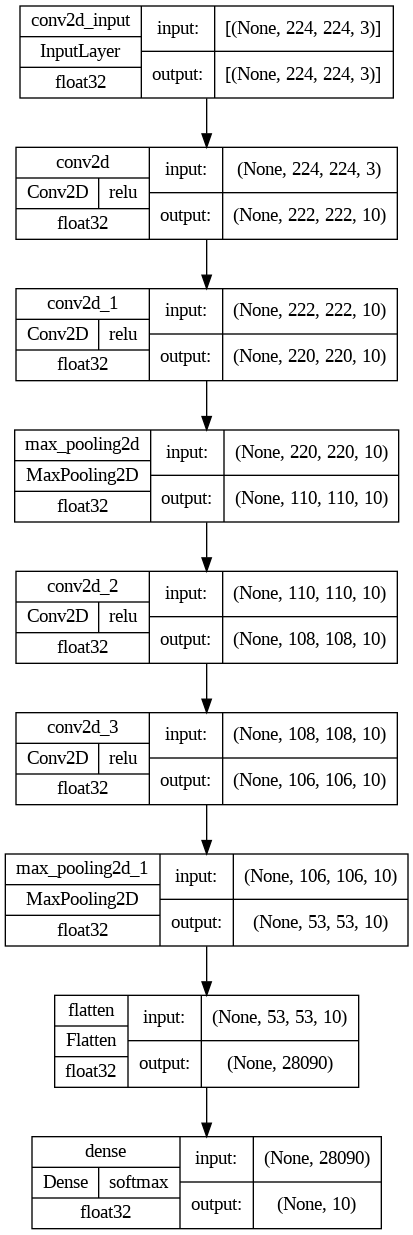

In [17]:
model_details(model1)

In [18]:
model1.evaluate(test_data)

79/79 [==============================] - 12s 156ms/step - loss: 2.6327 - accuracy: 0.2760


[2.6326873302459717, 0.2759999930858612]

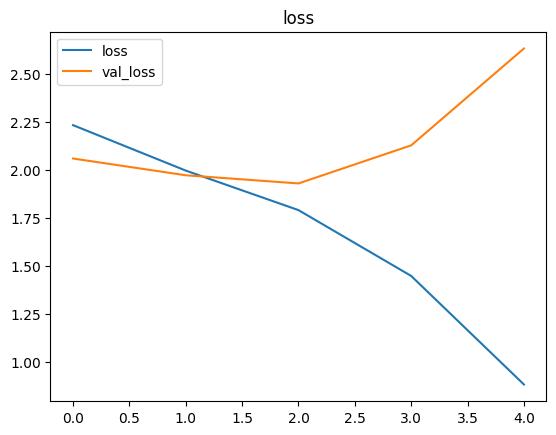

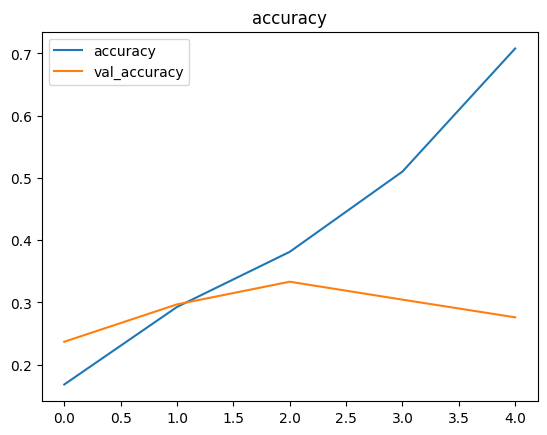

In [19]:
loss_curve(history)

In [35]:
def load_and_prep_image(filename, img_shape=224):
  
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [37]:
def pred_and_plot(model, filename, class_names):
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [21]:
model1.predict(test_data)

79/79 [==============================] - 12s 154ms/step


array([[9.3925565e-02, 7.4179804e-01, 1.3778269e-03, ..., 1.3582507e-05,
        1.2514148e-03, 7.6504238e-03],
       [8.4990403e-04, 2.8994618e-04, 1.5415671e-01, ..., 6.5761203e-01,
        2.4934998e-03, 3.7682354e-02],
       [1.4962355e-03, 1.3745449e-01, 4.9035233e-03, ..., 3.7236609e-06,
        4.3123282e-02, 3.3159254e-04],
       ...,
       [9.1684761e-04, 3.6604705e-01, 2.9259755e-03, ..., 4.1848398e-04,
        1.8162611e-01, 1.6698152e-02],
       [9.0039847e-04, 1.7806435e-02, 1.8737663e-02, ..., 3.6356848e-02,
        1.3481280e-01, 1.2058550e-02],
       [3.8902946e-03, 1.4723087e-02, 1.5924770e-03, ..., 5.6954067e-02,
        2.6792227e-03, 3.5664847e-01]], dtype=float32)

In [22]:
model1.save('10_food')

In [23]:
model1.save('food_pre.h5')

In [24]:
!ls food_pre.h5

food_pre.h5


In [26]:
load = tf.keras.models.load_model('food_pre.h5')

In [27]:
load.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [29]:
pred = load.predict(test_data)

79/79 [==============================] - 18s 234ms/step


In [31]:
class_names[pred[1].argmax()]

'chicken_curry'

In [33]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

1/1 [==============================] - 0s 225ms/step


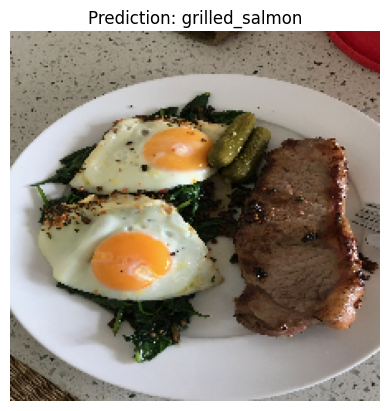

In [38]:
pred_and_plot(model=model1, 
              filename="03-steak.jpeg", 
              class_names=class_names)

lets build it by transfer learning so accuracy get increases